<a href="https://colab.research.google.com/github/trenyou686-arch/11-/blob/main/%E7%AC%AC11%E5%91%A8%E4%BD%9C%E4%B8%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


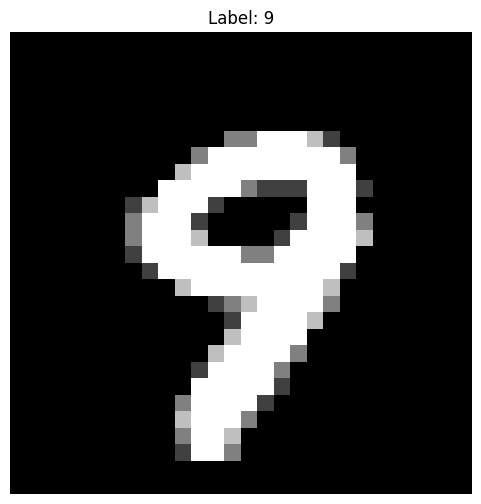

train_labels[5999] = 9


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# MNIST 데이터 로드
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# train_images[5999] 이미지 출력
plt.figure(figsize=(6, 6))
plt.imshow(train_images[5999], cmap='gray')
plt.title(f'Label: {train_labels[5999]}')
plt.axis('off')
plt.show()

# 해당 레이블 확인
print(f"train_labels[5999] = {train_labels[5999]}")

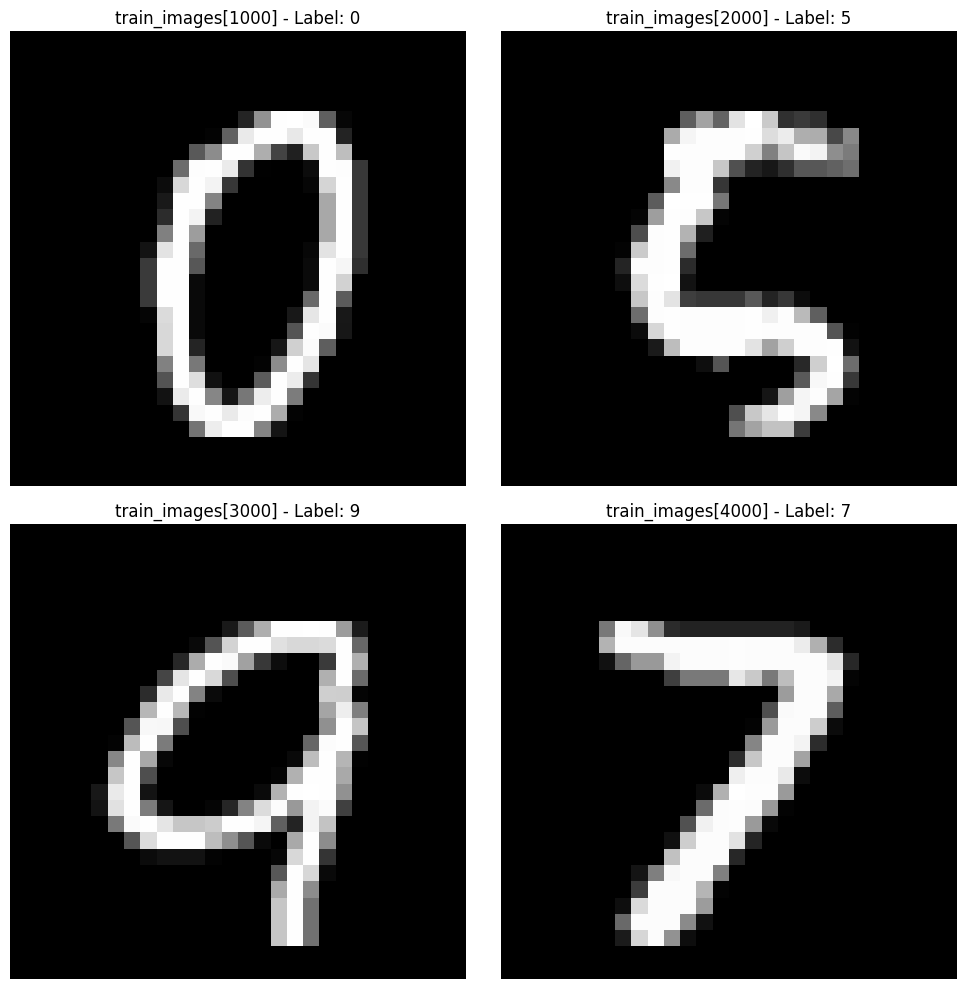

In [2]:
import matplotlib.pyplot as plt

# 2x2 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# 각 서브플롯에 이미지 표시
axes[0, 0].imshow(train_images[1000], cmap='gray')
axes[0, 0].set_title(f'train_images[1000] - Label: {train_labels[1000]}')
axes[0, 0].axis('off')

axes[0, 1].imshow(train_images[2000], cmap='gray')
axes[0, 1].set_title(f'train_images[2000] - Label: {train_labels[2000]}')
axes[0, 1].axis('off')

axes[1, 0].imshow(train_images[3000], cmap='gray')
axes[1, 0].set_title(f'train_images[3000] - Label: {train_labels[3000]}')
axes[1, 0].axis('off')

axes[1, 1].imshow(train_images[4000], cmap='gray')
axes[1, 1].set_title(f'train_images[4000] - Label: {train_labels[4000]}')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [3]:
from tensorflow import keras

# 은닉층 노드 수를 128로 변경한 모델 생성
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),  # 256에서 128로 변경
    keras.layers.Dense(10, activation='softmax'),
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 구조 출력
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow import keras

# 모델 생성
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

# SGD 옵티마이저로 컴파일
model.compile(optimizer='sgd',  # adam에서 sgd로 변경
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("모델이 SGD 옵티마이저로 컴파일되었습니다.")

모델이 SGD 옵티마이저로 컴파일되었습니다.


In [8]:
from tensorflow import keras
import numpy as np

# 데이터 전처리
train_images, test_images = train_images / 255.0, test_images / 255.0

# epochs=2로 학습
print("=== epochs=2 학습 ===")
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history1 = model1.fit(train_images, train_labels, epochs=2, verbose=1)
test_loss1, test_acc1 = model1.evaluate(test_images, test_labels, verbose=0)
print(f"epochs=2 테스트 정확도: {test_acc1:.4f}")

# epochs=5로 학습
print("\n=== epochs=5 학습 ===")
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history2 = model2.fit(train_images, train_labels, epochs=5, verbose=1)
test_loss2, test_acc2 = model2.evaluate(test_images, test_labels, verbose=0)
print(f"epochs=5 테스트 정확도: {test_acc2:.4f}")

# 결과 비교
print(f"\n=== 정확도 비교 ===")
print(f"epochs=2 정확도: {test_acc1:.4f}")
print(f"epochs=5 정확도: {test_acc2:.4f}")
print(f"정확도 차이: {test_acc2 - test_acc1:.4f}")

=== epochs=2 학습 ===
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8796 - loss: 0.4287
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9655 - loss: 0.1185
epochs=2 테스트 정확도: 0.9699

=== epochs=5 학습 ===
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8791 - loss: 0.4271
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9659 - loss: 0.1180
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9778 - loss: 0.0754
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9837 - loss: 0.0536
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9870 - loss: 0.0423
epochs=5 테스트 정확도: 0.9786

=== 정확도 비교 ===
epochs=2 정확도: 0.9699
epochs=5 정확도: 0.9786
정확도 차이: 0.0087
